In [80]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import os
from io import BytesIO
from csv import writer 

import pandas as pd

import nltk
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer as lm
from nltk import Text
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize as sentoken
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
from time import process_time

In [2]:
#리뷰 불러오기
path = 'C:/Users/taehee/Documents/GitHub/tripReviewAnalysisSystem/크롤러-전처리/원시자료/'
deoksugung = pd.read_csv(path+'Deoksugung.csv', engine='python', index_col = 0, encoding = 'utf-8')

deoksugung.head()

,star_point,title,text,Date of experience
0,4.0,"Small City Palace, Great for Visit if one is s...",A small palace compared to that of Gyeongbukgu...,November 2019
1,5.0,My favorite Palace,This is probably one of my most favorite Palac...,January 2020
2,5.0,Love of Beauty is Taste. The Creation of Beaut...,There is a common believe that most South Kore...,January 2020
3,5.0,Deoksugung is a unique palace,I visited 2 palaces (Deoksugung & Gyeongbokgun...,December 2019
4,5.0,Plan to Visit here and the other Historical Pl...,Why pay for tour guides when you can hop on an...,January 2020


In [3]:
# 별점에 따라 쪼개기
deoksugung["star_point"].unique()

array([4., 5., 3., 2.])

In [4]:
deoksugung_4 = deoksugung[deoksugung["star_point"]==4]
deoksugung_4.head()

,star_point,title,text,Date of experience
0,4.0,"Small City Palace, Great for Visit if one is s...",A small palace compared to that of Gyeongbukgu...,November 2019
6,4.0,Changing of the guard,I've been here a few times over the years and ...,November 2019
8,4.0,Changing of the guards,This is a much smaller palace as compared to t...,April 2019
10,4.0,Lovely autumn colours,Deoksugung is right at City Hall Station. I we...,November 2019
11,4.0,Great palace to visit at night,Deoksugung is the only palace open at night an...,September 2019


In [5]:
#과제 : 리팩토링하자. for문을 행렬화하자.

def attraction_12345(attraction):
    result= []
    for num in range(1,5+1):
        attraction_n = attraction[attraction["star_point"]==num]
        
        #for문 없이 합치기
        attraction_n_text =''.join(attraction_n['text'])
        '''
        for text in attraction_n['text']:
            attraction_n_text += (" " + text)
        '''
        
        ##다 소문자로 만들자. 컴퓨터는 The와 the가 다른 걸 모른다...
        lower_text_n = attraction_n_text.lower()
        token_n = retokenize.tokenize(lower_text_n)
        Text_n = Text(token_n)
        result.append((lower_text_n, Text_n, token_n))
        
    return result

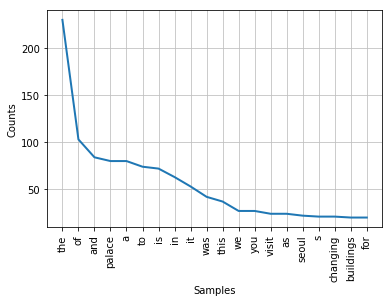

In [6]:
deoksugung_12345 = attraction_12345(deoksugung)
deoksugung_12345[5 -1][1].plot(20)
plt.show()

보면 알겠지만 the and 따위가 너무 많이 나온다.
불용어 = 쓸모 없는 단어 사전을 불러온다
NLTK랑 별도로 미리 다운로드 해둬야 한다.
http://www.nltk.org/data.html 참조

In [7]:
stop_words = set(stopwords.words('english')) 
stop_words|set(['.', ',', 'the', "'s"])

{"'s",
 ',',
 '.',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 

In [73]:
def attraction_12345(attraction):
    result= pd.DataFrame(columns=['lower_text_n','Text_n','token_n'])
    for num in range(1,5+1):
        attraction_n = attraction[attraction["star_point"]==num]
        
        #for문 없이 합치기
        ##다 소문자로 만들자. 컴퓨터는 The와 the가 다른 걸 모른다...
        lower_text_n =''.join(attraction_n['text']).lower()
        '''
        for text in attraction_n['text']:
            attraction_n_text += (" " + text)
        '''
        token_n = retokenize.tokenize(lower_text_n)
        filtered_token_n = [token for token in token_n if (token not in stop_words)]
        
        Text_n = Text(filtered_token_n)
        result.loc[num] = [lower_text_n, Text_n, filtered_token_n]
        
    return result

그리고 동사나 여러 친구들도 원형으로 복원하기 위해서...
sentoken으로 문장으로 나눠주고
pos_tag로 각 단어의 품사를 찾고
lm을 써서 원형으로 복원한다

In [39]:
deoksugung_12345 = attraction_12345(deoksugung)

In [10]:
def get_wordnet_pos(tag):
    """Map POS tag to first character lemmatize() accepts"""
    
    tag_dict = {'ADJ': "J",
                'NOUN':"N",
                'VERB':"V",
                'ADV':"R"}

    return tag_dict.get(tag)

In [11]:
def root_text_12345(attraction_12345):
    not_change = ['ADV','NOUN','ADP','CONJ','DET','NUM', 'PRT','X']    
    result_12345 = []
    for (index, lower_text_n, Text_n, token_n)in attraction_12345.itertuples():

        sentences = sentoken(lower_text_n)
    
        tagged_tokens = []
        
        for sentence in sentences:
            new_tokens = retokenize.tokenize(sentence)
            new_tagged_tokens = pos_tag(new_tokens, tagset='universal')
            tagged_tokens.extend(new_tagged_tokens)

        result_n = []
        for (token, tag) in filtered_tokens:
            if tag not in not_change:
                try:
                    root = lm.lemmatize(lm, word = token, pos = get_wordnet_pos(tag))
                except KeyError:
                    root = token
                result_n.append(root)
            else:
                result_n.append(token)

        result_12345.append(Text(filtered_tokens))
    return result_12345

In [40]:
deoksugung_text_5 = Text(retokenize.tokenize(deoksugung_12345[5 -1][0]))
#단어가 쓰인 문맥을 보여준다
deoksugung_text_5.concordance("palaces")

Displaying 25 of 25 matches:
the palace pass which contains five palaces come early to see the changing of t
the palace ground is huge where the palaces of each dynasty are spread over the
 a lot smaller than the other seoul palaces gyeongbokgung changdeokgung but it 
 although it is not as big as other palaces you still can enjoy there is a muse
 don t have enough time to go other palaces to visit this one is recommend it t
ce is far less tacky than the other palaces in seoul where a large proportion o
 are unaware if you can visit other palaces at night we would skip it if they d
e palace deoksugung one of the five palaces of the joseon dynasty this is a ver
00 krw if you plan to visit all the palaces including jongmyo shrine as it will
 warm up this is one of my favorite palaces in seoul i like that the palace is 
 middle of the bustling seoul these palaces are close to each other and it s al
not as impressive as those at other palaces were pleasant the changing of the g
 changing o

문맥을 보면 palaces는 덕수궁을 다른 궁궐과 비교할 때 많이 쓰는 모양이다. 이를 수학적으로 보여주는 함수도 있다.

In [41]:
#similar함수는 언어학적으로 주변 문맥을 탐색해서 비슷하게 쓰인 동의어를 찾아준다.
# palace의 동의어는 place 뿐이다.
context_5 = nltk.text.ContextIndex(deoksugung_12345[5 -1][1])

In [42]:
context_5.similar_words("palace")

['changdeokgung', 'makes', 'interesting', 'combined', 'great', 'seoul']

In [43]:
#반면에 경비병과 경비병들은 동의어로 나온다. 믿을만하다.
context_5.similar_words("guard")

['guards', 'events', 'verythe']

In [44]:
#빈도의 리스트도 필요하다.
fd_5 = deoksugung_12345[5 -1][1].vocab()
fd_5.most_common(20)

[('palace', 109),
 ('changing', 40),
 ('city', 34),
 ('ceremony', 29),
 ('visit', 28),
 ('one', 27),
 ('guard', 27),
 ('guards', 27),
 ('seoul', 27),
 ('palaces', 25),
 ('see', 23),
 ('hall', 22),
 ('place', 21),
 ('deoksugung', 19),
 ('also', 18),
 ('buildings', 16),
 ('nice', 15),
 ('well', 14),
 ('grounds', 14),
 ('get', 14)]

In [45]:
fd2 = nltk.FreqDist()
fd2['taehee'] = 2
fd2['taehee'] += 1
fd2['taehee']

3

In [46]:
test_rabbit = [('taehee',3),('rabbit',2)]
test_rabbit.remove(('taehee',3))
test_rabbit

[('rabbit', 2)]

In [47]:
#동의어를 그룹지어 준다다
def find_synonym_groups(context, fd):
    result = []
    all_words = fd.most_common()
    all_dict = dict(all_words)
    for (word, times) in all_words:                
        try:
            synonyms = context.similar_words(word)
            new_word = [word]
            for synonym in synonyms:
                new_word.append(synonym)
                synonym_times = all_dict[synonym]
                try:
                    all_words.remove((synonym, synonym_times))
                except ValueError:
                    continue
                except KeyError:
                    continue
                    
            result.append(new_word)
            
        except TypeError:
            result.append(word)
        except KeyError:
            continue
            
    return result

In [48]:
synonym_groups_5 = find_synonym_groups(context_5, fd_5)

In [49]:
synonym_groups_5[:3]

[['palace',
  'changdeokgung',
  'makes',
  'interesting',
  'combined',
  'great',
  'seoul'],
 ['changing', 'royal', 'two'],
 ['city', 'walking']]

In [50]:
from wordcloud import (WordCloud, get_single_color_func)

# 아래 두 함수는 저도 복붙해온 것이니 이해하려 하지 마십시오오

class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

class GroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func
        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [51]:
from random import randint
def random_color_to_groups(groups):
    result = {}
    for n, group in enumerate(groups):
        
        red_value = randint(100,255)
        green_value = randint(0,255 - int(red_value/2))
        blue_value = randint(0,255 - int((red_value+green_value)/2))
    
        rgb = [red_value,green_value,blue_value]
        rgb_color = "#"
        for color in rgb:
            if color < 16:
                rgb_color += "0"+hex(color)[-1]
            else:
                rgb_color += hex(color)[-2:]
        result[rgb_color] = group
    return result

In [52]:
import numpy as np
from PIL import Image
import os

mask_palace = np.array(Image.open("C:/Users/taehee/Pictures/palace3.png"))

In [53]:
wc_mask = WordCloud(background_color="white", max_words=500, mask = mask_palace, contour_width=2, contour_color='#ff9933', width=500, height=500)
wc = WordCloud(background_color="white", max_words=500, contour_width=2, contour_color='#ff9933', width=500, height=500)

default_color = 'grey'
wc.generate_from_frequencies(fd_5)
grouped_color_func = GroupedColorFunc(random_color_to_groups(synonym_groups_5), default_color)
wc.recolor(color_func=grouped_color_func)

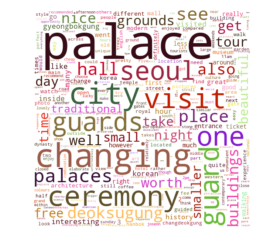

In [54]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [83]:
def get_rgb(avg_star):
        
    green_value = int(215 * (avg_star / 5))

    if green_value <16:
        green_hex = "0"+ hex(green_value)[-1]
    else:
        green_hex = hex(green_value)[-2:]
    
    return "#ff" + green_hex + "00"

def star_to_color(freq_data):
    
    result = {}    
    for row in freq_data.itertuples():
        
        word = row[0]
        rgb_color = get_rgb(row.avg_star)
        
        if rgb_color not in result:
            result[rgb_color] = [word]
        else:
            result[rgb_color].append(word)
    return result   

In [84]:
def word_avgstar(data_12345):
    '''
    입력 : 데이터프레임 of 텍스트
    출력 : 데이터 프레임 of 각 단어의 별점별 출현 빈도, 총 출현 빈도, 평균 별점점
    '''
    
    result = pd.DataFrame([text_n.vocab() for text_n in data_12345.Text_n]).T
    star_12345 = result * range(1,6)

    result['total_freq'] = result.sum(axis=1)
    result['avg_star'] = star_12345.sum(axis=1) / result['total_freq']

    return result
    
    # for 구 버전 함수
    '''
    total_star = {}
    total_freq = {}
    
    for n, root_n in enumerate(root_12345):
        freq_n = root_n.vocab()
        freq_n_words = freq_n.most_common()
        
        for (word, freq) in freq_n_words:
                total_star[word] += n * freq
                total_freq[word] += freq
    
    result ={}
    
    for word in total_freq.keys():
        result[word] = float(total_star[word]) / float(total_freq[word])
    '''

In [85]:
def word_cloud_test(data):
    '''
    입력 리뷰 데이터 프레임을 넣으면
    출력 각 단어별로 긍정 부정 가중치가 매겨진 워드클라우드가
    '''    
    
    process_time_list=[process_time()]
    print('시작')
    
    #별점별로 나누기
    #별점별로 합치고 소문자로 
    data_12345 = attraction_12345(data)
     
    print('별점 별 나누기 + 불용어 제거: 소요시간 [%f]초' %(process_time()-process_time_list[-1]))
    process_time_list.append(process_time())
    
    #단어별 평균 별점 계산
    #     total_star = pd.DataFrame(columns = ['total_star', 'total_freq'])
    
    data_12345.head()
        
    freq_data = word_avgstar(data_12345)
    total_freq = freq_data['total_freq']
    
    print('단어별 평균 별점 계산: 소요시간 [%f]초' %(process_time()-process_time_list[-1]))
    process_time_list.append(process_time())
    
    #단어별 평균 별점과 총 빈도수를 반영해, 워드클라우드 생성
    wc = WordCloud(background_color="white", max_words=500, contour_width=2, contour_color='#ff9933', width=500, height=500)
    default_color = 'grey'
    wc.generate_from_frequencies(total_freq)
    
    print('워드 클라우드 생성: 소요시간 [%f]초' %(process_time()-process_time_list[-1]))
    process_time_list.append(process_time())
    grouped_color_func = GroupedColorFunc(star_to_color(freq_data), default_color)
    wc.recolor(color_func=grouped_color_func)
    
    print('별점 별 색깔 지정 계산: 소요시간 [%f]초' %(process_time()-process_time_list[-1]))
    process_time_list.append(process_time())

    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

시작
별점 별 나누기 + 불용어 제거: 소요시간 [0.031250]초
단어별 평균 별점 계산: 소요시간 [0.062500]초
워드 클라우드 생성: 소요시간 [1.281250]초


C:\Users\taehee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


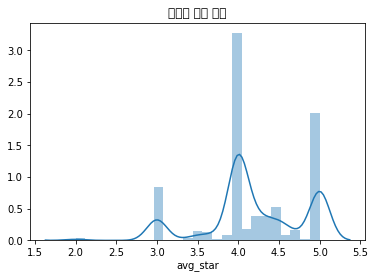

별점 별 색깔 지정 계산: 소요시간 [0.203125]초


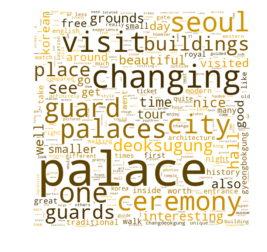

In [76]:
word_cloud_test(deoksugung)

In [86]:
def load_attraction_csv(github_path, file_list ,size):
    result = {file_list[0] : pd.read_csv(github_path + '크롤러-전처리/원시자료/' + file_list[0], encoding = 'utf-8', engine='python', index_col = 0)}
    stime=process_time()
    print('데이터 로딩 start')

    for file_path in file_list[:size]:
        new_data = pd.read_csv(github_path + '크롤러-전처리/원시자료/' + file_path, encoding = 'utf-8', engine='python', index_col = 0)
        result[file_path] = new_data
    
    print('데이터 로딩 종료: 소요시간 [%f]초' %(process_time()-stime))
        
    return result

file_list: ['63 City.txt', 'Alive Museum Insadong.txt', 'Amore Pacific Museum of Art.txt', 'An Jung-geun Memorial Hall.txt', 'Ansan Jarak-gil.txt', 'apm Place.txt', 'Arario Museum in Space.txt', "Baek In-je's House.txt", 'Banpodaegyo Bridge.txt', 'Bongeunsa Temple.txt']
데이터 로딩 start
데이터 로딩 종료: 소요시간 [0.015625]초
시작
별점 별 나누기 + 불용어 제거: 소요시간 [0.031250]초
단어별 평균 별점 계산: 소요시간 [0.031250]초
워드 클라우드 생성: 소요시간 [1.718750]초
별점 별 색깔 지정 계산: 소요시간 [0.015625]초


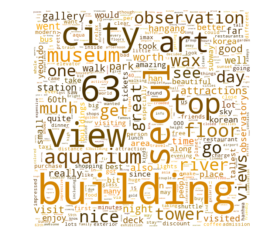

시작
별점 별 나누기 + 불용어 제거: 소요시간 [0.015625]초
단어별 평균 별점 계산: 소요시간 [0.031250]초
워드 클라우드 생성: 소요시간 [1.609375]초
별점 별 색깔 지정 계산: 소요시간 [0.015625]초


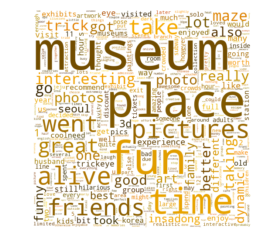

시작
별점 별 나누기 + 불용어 제거: 소요시간 [0.015625]초
단어별 평균 별점 계산: 소요시간 [0.015625]초
워드 클라우드 생성: 소요시간 [0.562500]초
별점 별 색깔 지정 계산: 소요시간 [0.000000]초


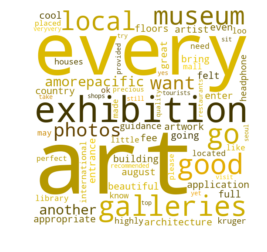

시작
별점 별 나누기 + 불용어 제거: 소요시간 [0.031250]초
단어별 평균 별점 계산: 소요시간 [0.031250]초
워드 클라우드 생성: 소요시간 [0.500000]초
별점 별 색깔 지정 계산: 소요시간 [0.000000]초


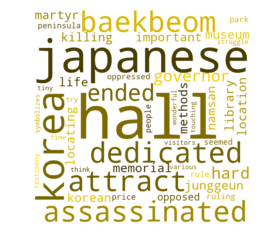

In [88]:
github_path = 'C:/Users/taehee/Documents/GitHub/tripReviewAnalysisSystem/'
file_list = os.listdir(github_path + '크롤러-전처리/원시자료/')

print ("file_list: {}".format(file_list[:10]))

data_4 = load_attraction_csv(github_path, file_list ,4)

for data in data_4.values():
    word_cloud_test(data)